## Observations and Insights

## Dependencies and starter code

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_metadata)
mouse_results = pd.read_csv(study_results)

In [6]:
# Combine the data into a single dataset
study_data = pd.merge(mouse_data, mouse_results, on="Mouse ID")
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = study_data["Drug Regimen"].unique()
regimen

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [8]:
regimen_stats = study_data.groupby(["Drug Regimen"])

regimen_mean = regimen_stats["Tumor Volume (mm3)"].mean()
regimen_median = regimen_stats["Tumor Volume (mm3)"].median()
regimen_variance = regimen_stats["Tumor Volume (mm3)"].var()
regimen_std = regimen_stats["Tumor Volume (mm3)"].std()
regimen_sem = regimen_stats["Tumor Volume (mm3)"].sem()

In [9]:
regimen_summary = pd.DataFrame({"Mean": regimen_mean, "Median": regimen_median, "Variance": regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [ ]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_bar_points = regimen_stats.count()["Mouse ID"]
regimen_bar_points

Text(0, 0.5, 'Data Samples')

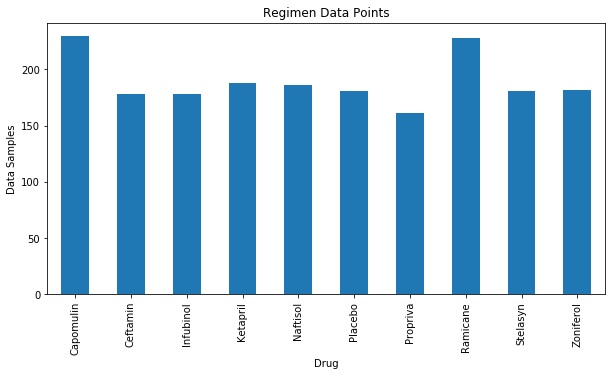

In [11]:
regimen_bar_points.plot(kind="bar", figsize=(10,5))
plt.title("Regimen Data Points")
plt.xlabel("Drug")
plt.ylabel("Data Samples")

TypeError: '>' not supported between instances of 'int' and 'builtin_function_or_method'

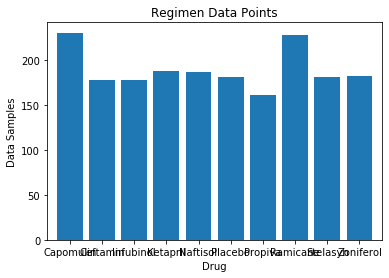

In [23]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(regimen_bar_points))
tick_locations = [value for value in x_axis]

plt.title("Regimen Data Points")
plt.xlabel("Drug")
plt.ylabel("Data Samples")
plt.xticks(tick_locations, ["Capomulin", "Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propiva","Ramicane","Stelasyn","Zoniferol"])
plt.bar(x_axis, regimen_bar_points)
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max)


## Pie plots

In [55]:
#male and female data
gender_group = study_data.groupby(["Sex"]).count()
gender_group

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


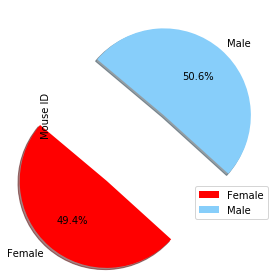

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders = ["Male", "Female"]
gender_counts = [958, 935]
colors = ["red", "lightskyblue"]
explode = (1, 0)

plot= gender_group.plot.pie(y='Mouse ID', colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x2686589a748>,
 [Text(-1.3189076929170447, -1.634161099024279, 'Male'),
  Text(0.690856410575595, 0.8559891471079556, 'Female')],
 [Text(-1.0048820517463197, -1.2450751230661172, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

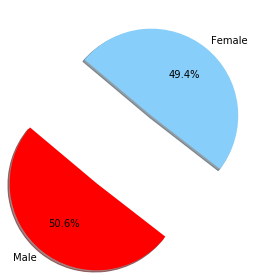

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Male", "Female"]
gender_counts = [958, 935]
colors = ["red", "lightskyblue"]
explode = (1, 0)

plt.pie(gender_counts, labels=genders, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, outliers and boxplots

In [90]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers.
cap_data = study_data.loc[study_data["Drug Regimen"] == "Capomulin",:]
cef_data = study_data.loc[study_data["Drug Regimen"] == "Ceftamin",:]
inf_data = study_data.loc[study_data["Drug Regimen"] == "Infubinol",:]
ram_data = study_data.loc[study_data["Drug Regimen"] == "Ramicane",:]

In [92]:
cap_vol = cap_data.groupby("Mouse ID").max()["Timepoint"]
cap_df = pd.DataFrame(cap_vol)
cap_final = pd.merge(cap_df, study_data, on=("Mouse ID", "Timepoint"), how="left")
cap_final.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [82]:
cap_iqr = cap_final["Tumor Volume (mm3)"]

quartiles = cap_iqr.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomuiln is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomuiln is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [63]:
cef_vol = cef_data.groupby("Mouse ID").max()["Timepoint"]
cef_df = pd.DataFrame(cef_vol)
cef_final = pd.merge(cef_df, study_data, on=("Mouse ID", "Timepoint"), how="left")
cef_final.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [83]:
cef_iqr = cef_final["Tumor Volume (mm3)"]

quartiles = cef_iqr.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [84]:
inf_vol = inf_data.groupby("Mouse ID").max()["Timepoint"]
inf_df = pd.DataFrame(inf_vol)
inf_final = pd.merge(inf_df, study_data, on=("Mouse ID", "Timepoint"), how="left")
inf_final.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [85]:
inf_iqr = inf_final["Tumor Volume (mm3)"]

quartiles = inf_iqr.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [69]:
ram_vol = ram_data.groupby("Mouse ID").max()["Timepoint"]
ram_df = pd.DataFrame(ram_vol)
ram_final = pd.merge(ram_df, study_data, on=("Mouse ID", "Timepoint"), how="left")
ram_final.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [87]:
ram_iqr = ram_final["Tumor Volume (mm3)"]

quartiles = ram_iqr.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


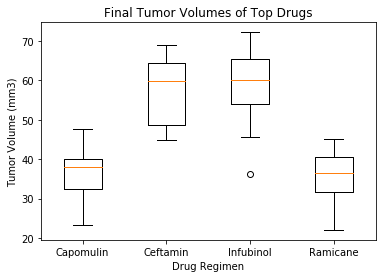

In [88]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumors = [cap_iqr, cef_iqr, inf_iqr, ram_iqr]

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volumes of Top Drugs")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumors, labels=["Capomulin", "Ceftamin", "Infubinol","Ramicane"])
plt.show()

## Line and scatter plots

In [94]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_line_data = cap_data.loc[cap_data["Mouse ID"] == "f966",:]
cap_line_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
60,f966,Capomulin,Male,16,17,0,45.000000,0
61,f966,Capomulin,Male,16,17,5,38.796474,0
62,f966,Capomulin,Male,16,17,10,35.624403,0
63,f966,Capomulin,Male,16,17,15,32.623003,0
64,f966,Capomulin,Male,16,17,20,30.485985,0


<function matplotlib.pyplot.show(*args, **kw)>

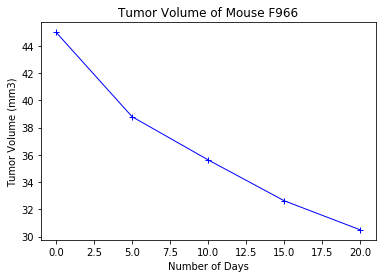

In [95]:
x_axis = cap_line_data["Timepoint"]
tum_vol = cap_line_data["Tumor Volume (mm3)"]

plt.plot(x_axis, tum_vol, marker="+", color="blue", linewidth=1)
plt.title("Tumor Volume of Mouse F966")
plt.xlabel("Number of Days")
plt.ylabel("Tumor Volume (mm3)")
plt.show

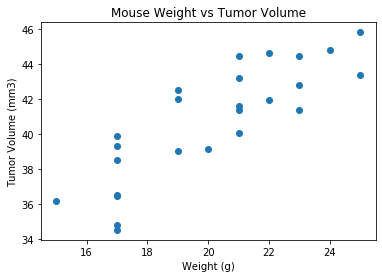

In [97]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_avg = cap_data.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [100]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and tumor volume for Capomulin is {correlation}.")

The correlation between mouse weight and tumor volume for Capomulin is 0.84.


In [102]:
line_data = st.linregress(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
line_data

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [103]:
slope = 0.95
intercept = 21.55

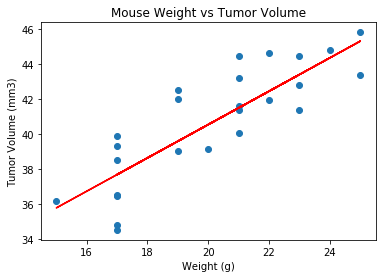

In [106]:
y_values = cap_avg['Weight (g)']*slope+intercept
plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.plot(cap_avg['Weight (g)'], y_values, color="red")
plt.title("Mouse Weight vs Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()